# Movie Reviews Sentiment Analysis using XGBoost

This project utilizes the powerful XGBoost classifier to accurately predict the sentiment of IMDB movie reviews. By leveraging advanced gradient boosting techniques, XGBoost effectively extracts meaningful features from text data, enabling it to distinguish between positive and negative reviews. This model aims to provide insights into audience sentiment, aiding in movie recommendation and marketing strategies.

# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Explore Dataset

In [14]:
df = pd.read_csv(r'C:\Users\user\Desktop\CognoRise Infotech ML Intern\data\IMDB_data.csv')
print("Dataset Loaded! Shape:", df.shape)
print("\nDataset Info:") 
df.info()

Dataset Loaded! Shape: (50000, 2)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [15]:
# check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
review       0
sentiment    0
dtype: int64


In [17]:
# check for class balance in the target variable
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())


Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_24784\1744468319.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


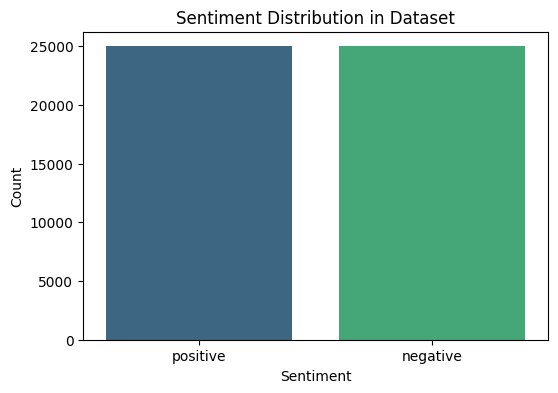

In [18]:
# visualize the sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title("Sentiment Distribution in Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Data Preprocessing

In [19]:
# convert sentiment labels to numeric format ('positive'=1, 'negative'=0)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [20]:
# text cleaning function
def clean_text(text):
    # remove HTML tags, URLs, special characters, and numbers
    text = re.sub(r'<.*?>', '', text) # HTML tags
    text = re.sub(r'https\S+', '', text) # URLs
    text = re.sub(r'[^A-Za-z\s]', '', text) # special characters and numbers
    text = text.lower().strip() # lowercase and strip whitespace
    return text

In [21]:
# apply text cleaning
df['review'] = df['review'].apply(clean_text)

In [23]:
# display a few examples of cleaned text data
print("\nSample of Cleaned Reviews:")
print(df['review'].head())


Sample of Cleaned Reviews:
0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object


In [24]:
# splitting dataset into features and target variable
X = df['review']
y = df['sentiment']

In [25]:
# convert text data to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000) 
X_tfidf = tfidf.fit_transform(X)

In [27]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [29]:
# Model Training XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

C:\Users\user\Desktop\CognoRise Infotech ML Intern\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [08:48:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [30]:
# Model Evaluation
y_pred = xgb.predict(X_test)

In [31]:
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8573


In [32]:
# print classification report
print("\nClassification Report: \n", classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


Classification Report: 
               precision    recall  f1-score   support

    Negative       0.87      0.84      0.85      4961
    Positive       0.85      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



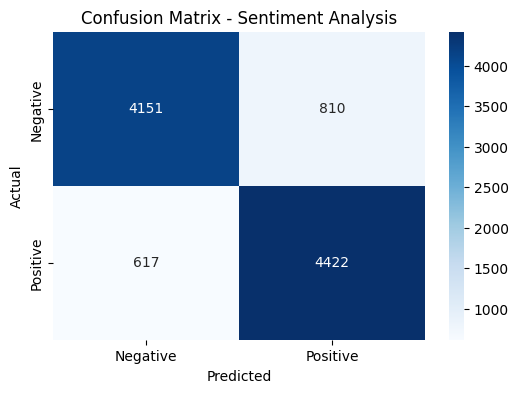

In [34]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix - Sentiment Analysis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()